*Datasets used in this example are a system of hard hexagons, simulated in the NVT thermodynamic ensemble in HOOMD-Blue, for a dense fluid (phi065) and a solid (phi075)*

In [1]:
%matplotlib notebook
import numpy as np
import time
import PIL.Image
import io
import IPython.display
from freud import parallel
parallel.setNumThreads(4)

def showarray(a, fmt='png'):
    f = io.BytesIO()
    PIL.Image.fromarray(a, mode='RGBA').save(f, fmt)
#     PIL.Image.fromarray(a, mode='RGBA').save("out.png")
    return IPython.display.display(IPython.display.Image(data=f.getvalue(), width=600))

# Hexatic Order Parameter

The hexatic order parameter measures how closely the local environment around a particle resembles perfect $k$-atic symmetry e.g. how closely the environment resembles hexagonal/hexatic symmetry if the order parameter is $k=6$. The order parameter is given by:

$$
\psi_k \left( i \right) = \frac{1}{n} \sum \limits_j^n e^{k i \phi_{ij}}
$$

where $\phi_{ij}$ is the angle between the vector $r_{ij}$ and $ \vec{\left(1, 0\right)}$

The pseudocode is given below

~~~
for each particle i:
    neighbors = nearestNeighbors(i, n):
    for each particle j in neighbors:
        r_ij = position[j] - position[i]
        psi_ij = arctan2(r_ij.y, r_ij.x)
        psi_array[i] += exp(complex(0,k*psi_ij))
~~~

An example which calculates and renders the scene is shown below:

time to calc 1 frame = 0.03169584274291992
Error importing: cannot import name '_gpu'


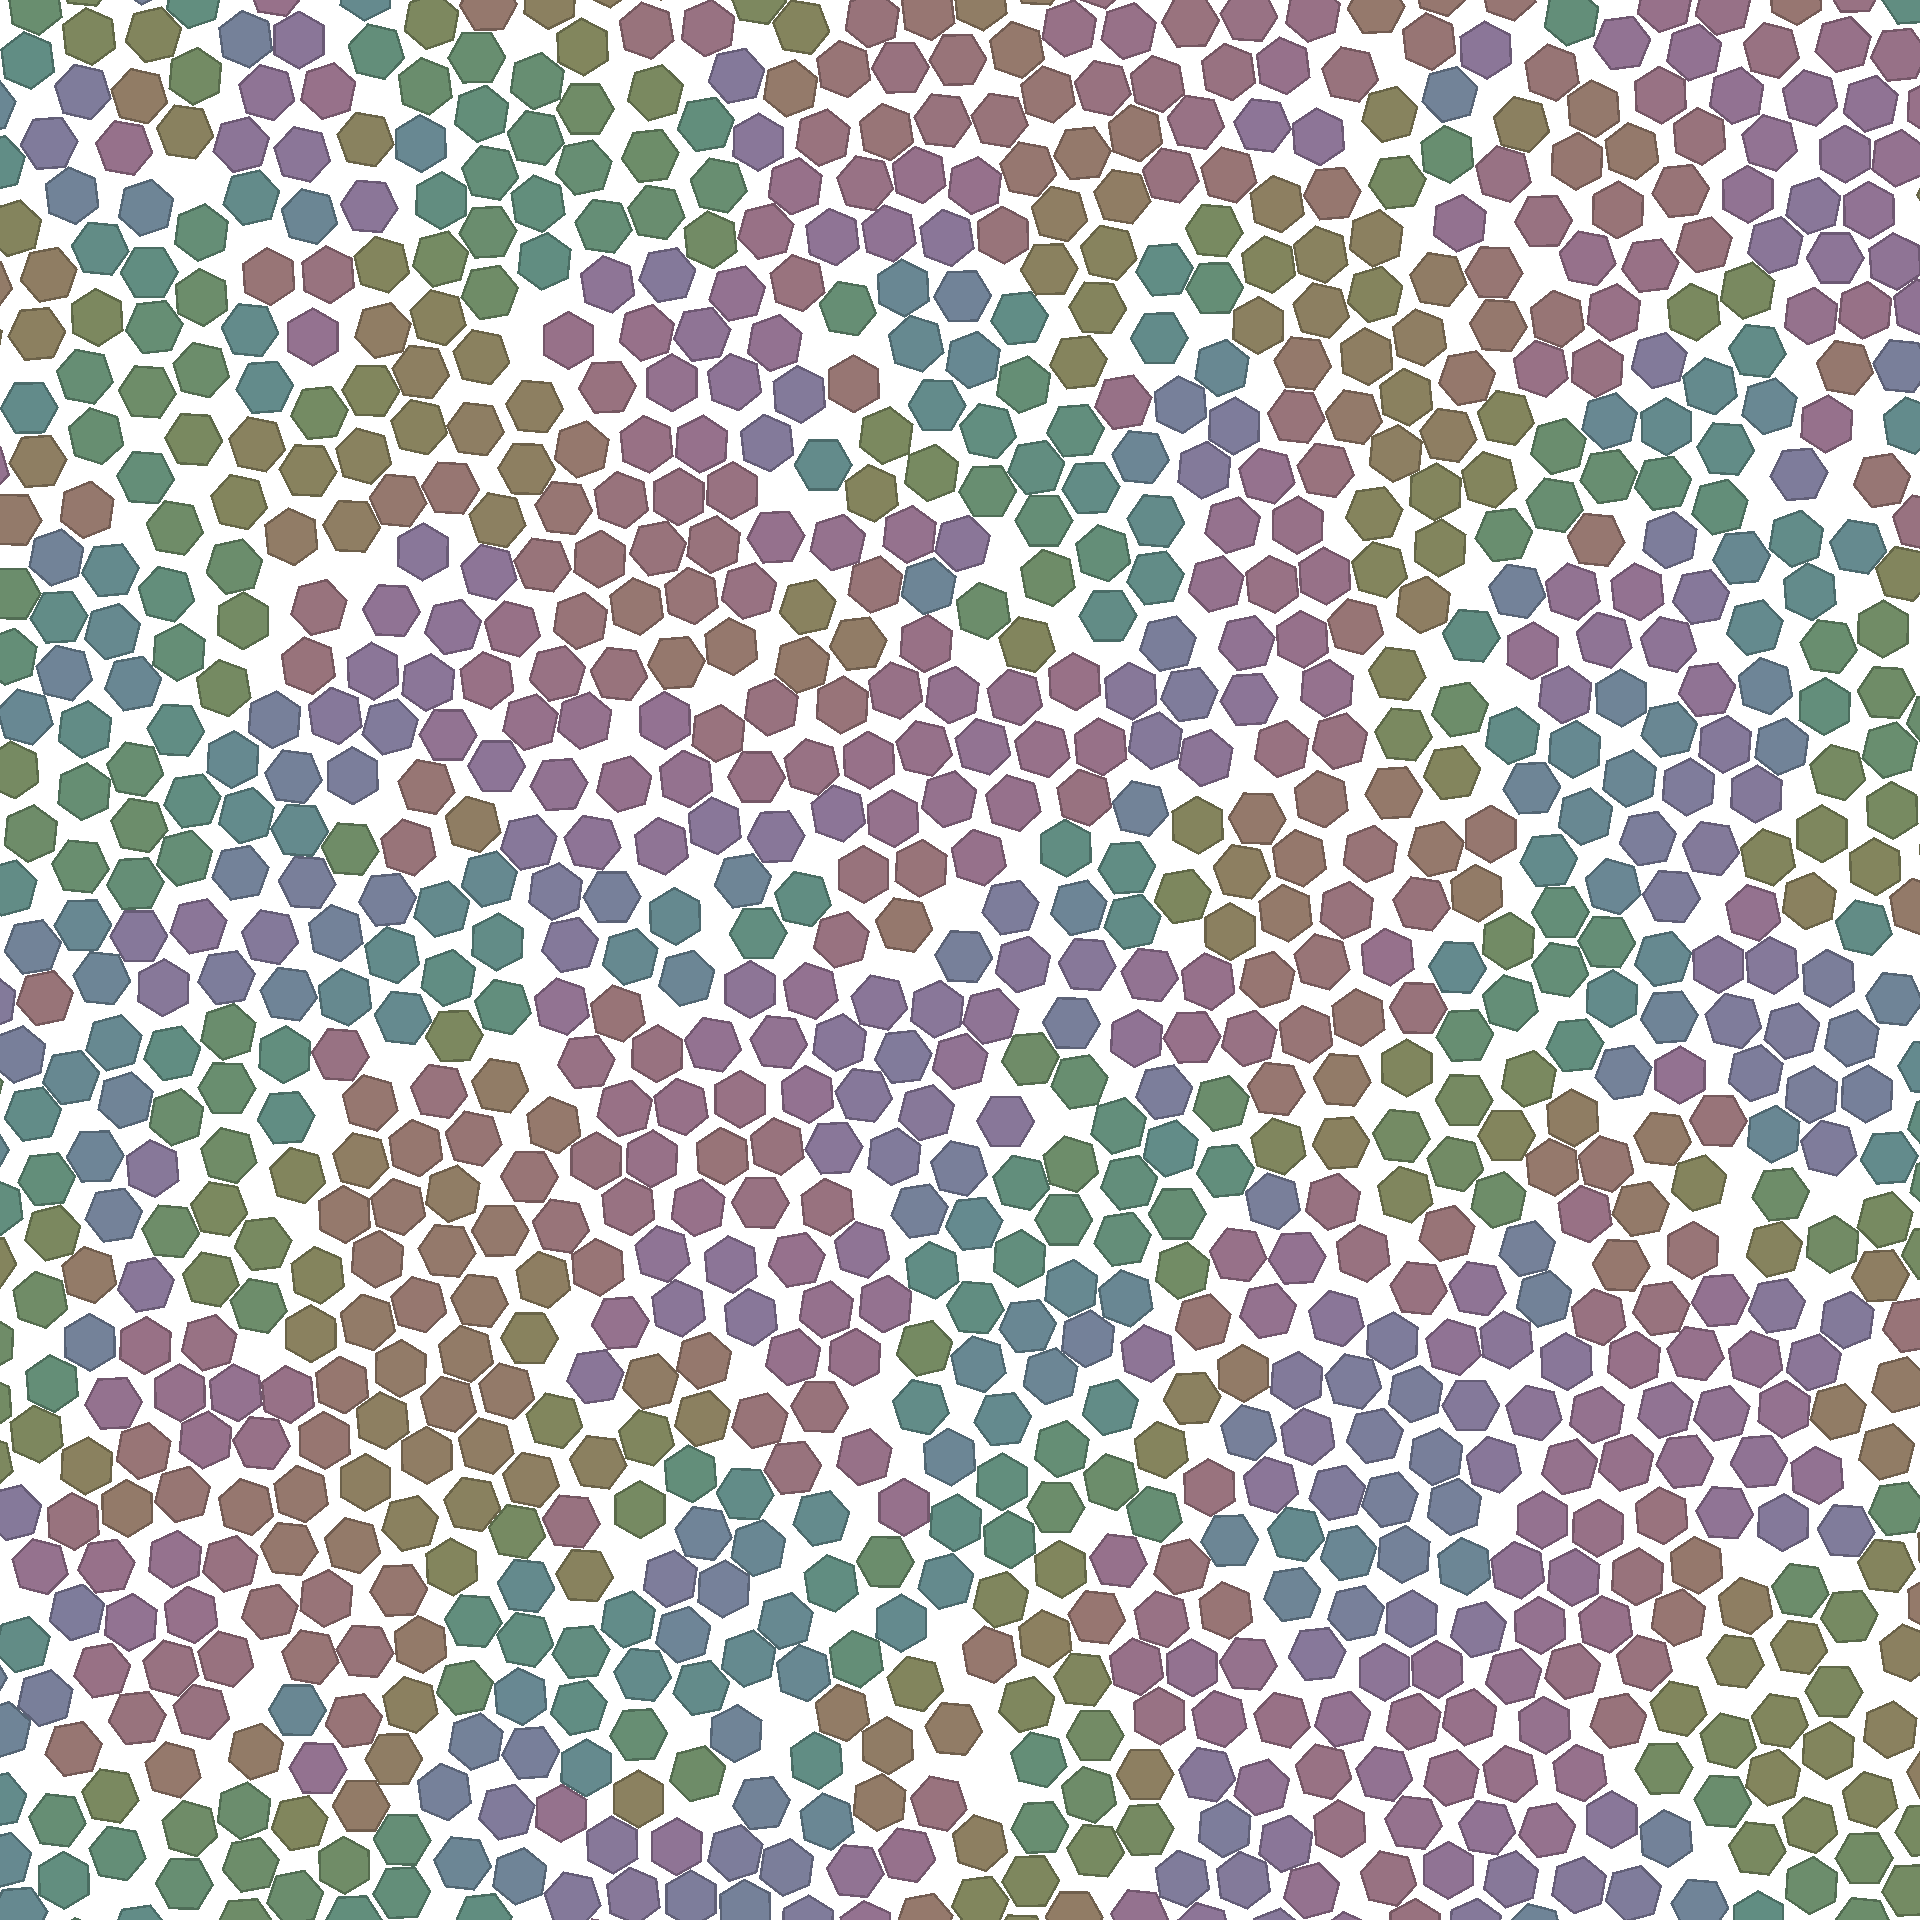

In [2]:
# TODO: add in example hexatic code, just pass to rendering
# import wrapped script and run

from freud import box, order
# create hexatic object
hex_order = order.HexOrderParameter(rmax=1.2, k=6, n=6);

# load the data
data_path = "ex_data/phi065"
box_data = np.load("{}/box_data.npy".format(data_path))
pos_data = np.load("{}/pos_data.npy".format(data_path))
quat_data = np.load("{}/quat_data.npy".format(data_path))
n_frames = pos_data.shape[0]

# grab data from last frame
l_box = box_data[-1]
l_pos = pos_data[-1]
l_quat = quat_data[-1]
l_ang = 2*np.arctan2(np.copy(l_quat[:,3]), np.copy(l_quat[:,0]))

# create box
fbox = box.Box(Lx=l_box["Lx"], Ly=l_box["Ly"], is2D=True)

# compute hexatic order for 6 nearest neighbors
start_time = time.time()
hex_order.compute(fbox, l_pos)
stop_time = time.time()
print("time to calc 1 frame = {}".format(stop_time-start_time))
# get values from freud object
psi_k = hex_order.getPsi()
avg_psi_k = np.mean(psi_k)

# render; will be different depending on your software
import fresnel_import

a = fresnel_import.render_in_fresnel(l_pos, l_ang, psi_k, avg_psi_k)
showarray(a)